In [1]:
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [3]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

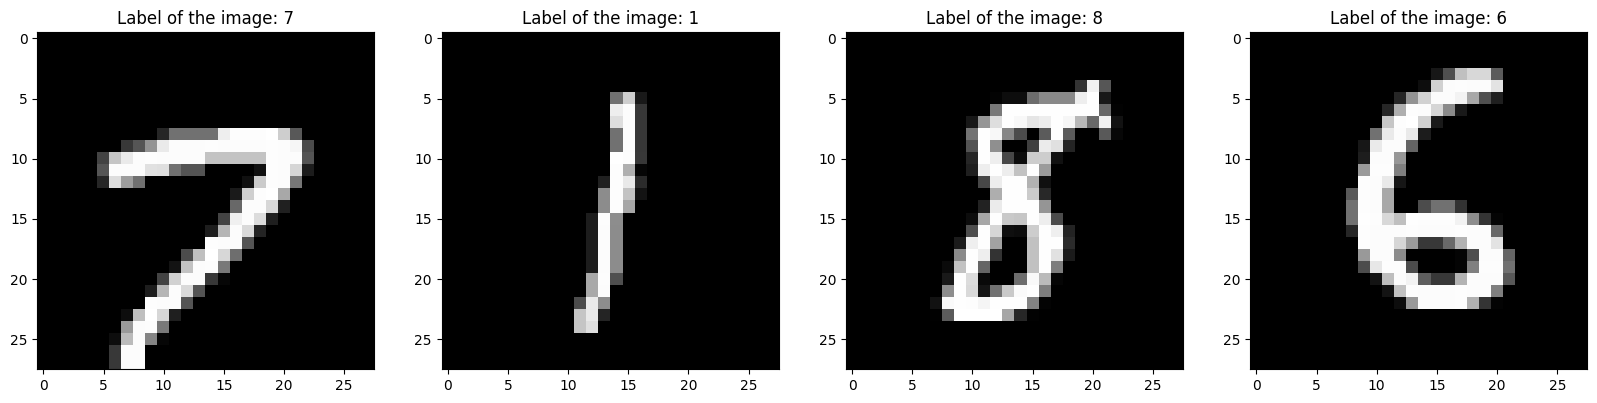

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the tanh activation function for each layer.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(64, activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 1.0410 - accuracy: 0.7443
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5159 - accuracy: 0.8733
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4172 - accuracy: 0.8905
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3709 - accuracy: 0.8992
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3424 - accuracy: 0.9049
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3223 - accuracy: 0.9098
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3068 - accuracy: 0.9135
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2941 - accuracy: 0.9170
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2834 - accuracy: 0.9193
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2739 - accuracy: 0.921

In [7]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2054636925458908
Test accuracy: 0.9413999915122986


Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the sigmoid activation function for each layer.

In [8]:
model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
# The second dense layer
model.add(Dense(64, activation="sigmoid"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 2.2838 - accuracy: 0.1687
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 2.2275 - accuracy: 0.3625
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 2.1625 - accuracy: 0.5067
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 2.0700 - accuracy: 0.5674
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 1.9393 - accuracy: 0.5944
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 1.7724 - accuracy: 0.6241
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 1.5888 - accuracy: 0.6572
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 1.4130 - accuracy: 0.6879
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 1.2585 - accuracy: 0.7174
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 1.1280 - accuracy: 0.7441

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5635730028152466
Test accuracy: 0.8528000116348267


Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the ReLU activation function for each layer.

In [10]:
model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(64, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.1630 - accuracy: 0.7133
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4768 - accuracy: 0.8768
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3801 - accuracy: 0.8955
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3387 - accuracy: 0.9048
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3125 - accuracy: 0.9119
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2928 - accuracy: 0.9172
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2767 - accuracy: 0.9214
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2633 - accuracy: 0.9249
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2511 - accuracy: 0.9283
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2404 - accuracy: 0.931

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.16706225275993347
Test accuracy: 0.9513000249862671


The reLu activiation models has the highest accuracies in both training and test scores.

Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers.  Compare all three activiation functions using hing loss.

In [12]:
model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# The second dense layer
model.add(Dense(64, activation="tanh"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.9783 - accuracy: 0.4491
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7510 - accuracy: 0.7111
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5688 - accuracy: 0.8066
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4542 - accuracy: 0.8533
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3807 - accuracy: 0.8711
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3351 - accuracy: 0.8810
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3049 - accuracy: 0.8879
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2833 - accuracy: 0.8926
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2668 - accuracy: 0.8967
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2537 - accuracy: 0.9003

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.18285320699214935
Test accuracy: 0.9230999946594238


In [14]:
model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
# The second dense layer
model.add(Dense(64, activation="sigmoid"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.0146 - accuracy: 0.1337
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 1.0105 - accuracy: 0.1728
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0087 - accuracy: 0.2285
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 1.0054 - accuracy: 0.2846
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 1.0013 - accuracy: 0.3355
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 1.0008 - accuracy: 0.3900
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 1.0005 - accuracy: 0.4395
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0002 - accuracy: 0.4818
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.9999 - accuracy: 0.5175
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.9996 - accuracy: 0.5474

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.9968907237052917
Test accuracy: 0.7027000188827515


In [16]:
model = Sequential()
# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(64, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.0122 - accuracy: 0.3162
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.9681 - accuracy: 0.5431
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.8403 - accuracy: 0.6623
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6199 - accuracy: 0.7663
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4457 - accuracy: 0.8414
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3511 - accuracy: 0.8723
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3005 - accuracy: 0.8854
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2701 - accuracy: 0.8932
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2497 - accuracy: 0.8990
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2345 - accuracy: 0.9033

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.16298449039459229
Test accuracy: 0.9284999966621399


Again, reLU performed the best. However, the accuaries for the hinge loss function were lower in comparison to the cross entropy loss models.